<a href="https://colab.research.google.com/github/edolahartu/Final-Project-Fake-News/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library & Dataset

In [ ]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Library For Visualization

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

In [ ]:
from google.colab import drive

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/KULIAH/Data Science Bootcamp/Final Project - Fake News/news.csv')
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


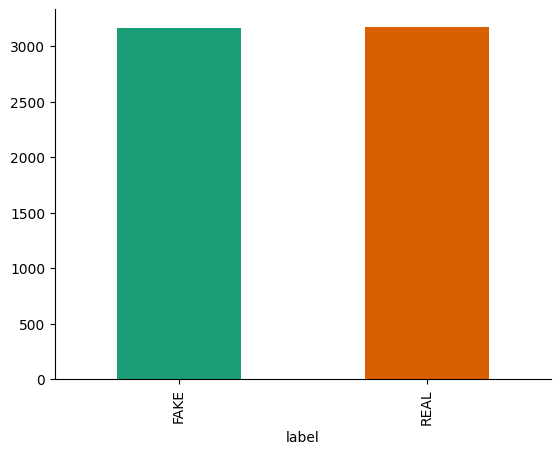

In [ ]:
# @title label

data.groupby('label').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Data Checking

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
data.shape

(6335, 4)

In [ ]:
data['label'].value_counts(normalize = True) * 100

label
REAL    50.055249
FAKE    49.944751
Name: proportion, dtype: float64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

# Data Exploratory

In [ ]:
independent = data['text']
dependent = data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size = 0.1, random_state = 10)

print("Dimensi X_train dataset: ", X_train.shape)
print("Dimensi y_train dataset: ", y_train.shape)
print("Dimensi X_test dataset: ", X_test.shape)
print("Dimensi y_test dataset: ", y_test.shape)

Dimensi X_train dataset:  (5701,)
Dimensi y_train dataset:  (5701,)
Dimensi X_test dataset:  (634,)
Dimensi y_test dataset:  (634,)


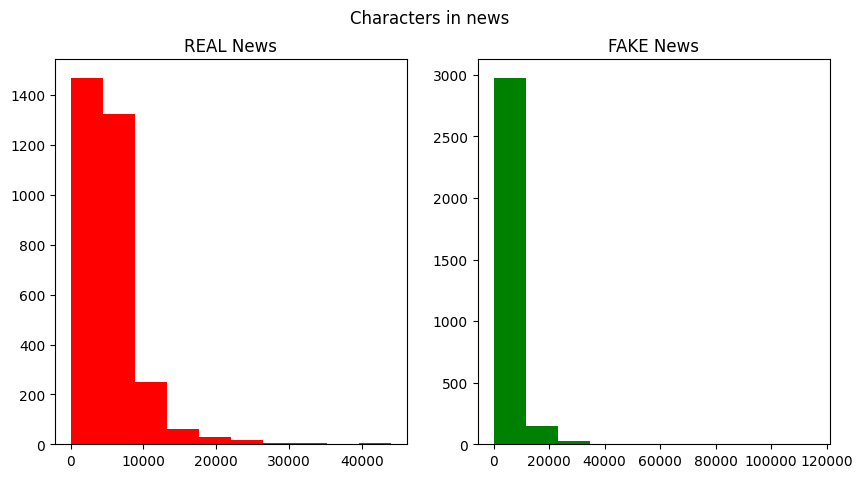

In [ ]:
# Number Characters In News

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
REAL=data[data['label']=='REAL']['text'].str.len()
ax1.hist(REAL,color='red')
ax1.set_title('REAL News')
Fake=data[data['label']=='FAKE']['text'].str.len()
ax2.hist(Fake,color='green')
ax2.set_title('FAKE News')
fig.suptitle('Characters in news')
plt.show()

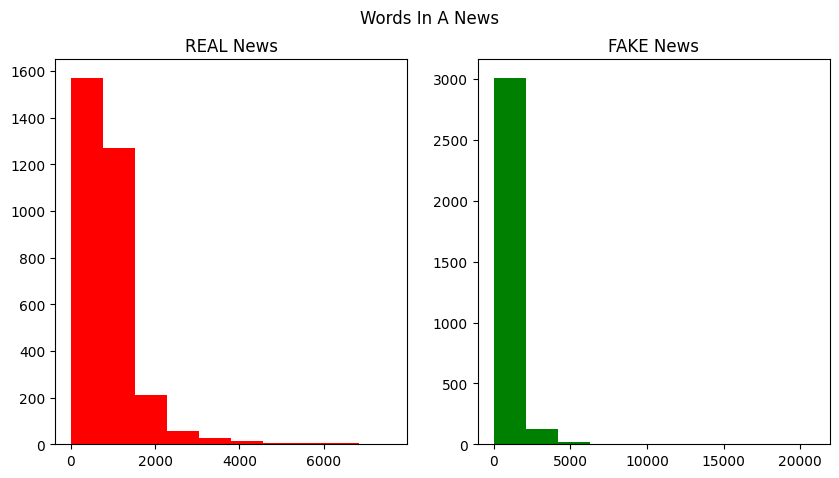

In [ ]:
# Number Of Words In News

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
real_news_len=data[data['label']=='REAL']['text'].str.split().map(lambda x: len(x))
ax1.hist(real_news_len,color='red')
ax1.set_title('REAL News')
fake_news_len=data[data['label']=='FAKE']['text'].str.split().map(lambda x: len(x))
ax2.hist(fake_news_len,color='green')
ax2.set_title('FAKE News')
fig.suptitle('Words In A News')
plt.show()

In [ ]:
data_vect = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

data_train = data_vect.fit_transform(X_train)
data_test = data_vect.transform(X_test)

In [ ]:
pd.DataFrame(data_test)

,0
0,"(0, 63726)\t0.033083959906980404\n (0, 6368..."
1,"(0, 63679)\t0.031492631697216736\n (0, 6322..."
2,"(0, 63679)\t0.028338876546734417\n (0, 6329..."
3,"(0, 63679)\t0.03296104394695903\n (0, 63403..."
4,"(0, 63218)\t0.04015647125504287\n (0, 63061..."
...,...
629,"(0, 63688)\t0.012800500425778998\n (0, 6367..."
630,"(0, 63700)\t0.06890609076827997\n (0, 63308..."
631,"(0, 63790)\t0.029724719454126337\n (0, 6368..."
632,"(0, 64072)\t0.023577512053785075\n (0, 6383..."


In [ ]:
pac = PassiveAggressiveClassifier(max_iter = 50)

model = pac.fit(data_train, y_train)
model

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
data_test1.head()

,text,label
5781,The first nine months of 2013 have convinced u...,REAL
2699,Heseltine strangled dog as part of Thatcher ca...,FAKE
3336,Former Democratic presidential candidate Jim W...,REAL
867,David M. Perry is an associate professor of hi...,REAL
3490,Getty - Kevin Mazur The Wildfire is an opinion...,FAKE


In [ ]:
y_pred = model.predict(data_test1_vect.iloc[0].values.reshape(1,-1))
y_pred

AttributeError: 'csr_matrix' object has no attribute 'iloc'

In [ ]:
y_pred = pac.predict(data_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,)}%')

Accuracy: 94%


In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
cm

array([[294,  10],
       [ 21, 309]])

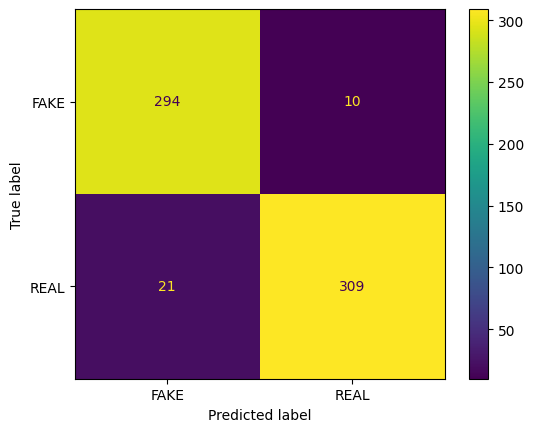

In [ ]:


cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['FAKE', 'REAL'])
cm_display.plot()

In [ ]:
data_test1 = pd.concat([X_test, y_test], axis=1)
data_test1.head()

,text,label
5781,The first nine months of 2013 have convinced u...,REAL
2699,Heseltine strangled dog as part of Thatcher ca...,FAKE
3336,Former Democratic presidential candidate Jim W...,REAL
867,David M. Perry is an associate professor of hi...,REAL
3490,Getty - Kevin Mazur The Wildfire is an opinion...,FAKE


In [ ]:
y_pred = model.predict(X_test.iloc[0].values.reshape(1,-1))

<634x64670 sparse matrix of type '<class 'numpy.float64'>'
	with 156236 stored elements in Compressed Sparse Row format>

In [ ]:
X_test

5781    The first nine months of 2013 have convinced u...
2699    Heseltine strangled dog as part of Thatcher ca...
3336    Former Democratic presidential candidate Jim W...
867     David M. Perry is an associate professor of hi...
3490    Getty - Kevin Mazur The Wildfire is an opinion...
                              ...                        
4140    I’m not among those Republicans who have “evol...
1806    MARION, Ind. — What started as a handful of Do...
1629    (CNN) It began with the arrests of a handful o...
3914    Bill Clinton spent 13 minutes yesterday forcef...
150     Notable names include Ray Washburne (Commerce)...
Name: text, Length: 634, dtype: object